# Background of Dataset

Introduction To Your Dataset: recording country happiness scores in 3 years 2015 to 2017. Relating factors to happiness were also recorded.

1. Country: Name of the country.
2. Region: Region the country belongs to.
3. Happiness Score: A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
4. Economy: the extend to which a country GDP contributes to the calculation of the Happiness Score
5. Family: The extent to which Family contributes to the calculation of the Happiness Score
5. Health: The extent to which Life expectancy contributed to the calculation of the Happiness Score
6. Freedom: The extent to which Freedom contributed to the calculation of the Happiness Score.
7. Corruption: The extent to which Perception of Corruption contributes to Happiness Score.
8. Generosity: The extent to which Generosity contributed to the calculation of the Happiness Score.
9. Dictatorship: The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

The business background

- To understand what factors affect a country's happiness based on invididual citizen

Why you choose this specific dataset to work on?

- It is interesting to understand how people perceive happiness


  # Explore the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('worldhappiness_2015_2017.csv')

In [3]:
data.head(10)

,Country,Region,Year,Happiness Rank,Happiness Score,Economy,Family,Life Expectancy,Freedom,Corruption,Generosity,Dictatorship
0,Switzerland,Western Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,2015,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,2015,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,2015,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,2015,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,2015,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
# Create 3 separate dataset by year

data_2015 = data[data['Year']==2015]
data_2016 = data[data['Year']==2016]
data_2017 = data[data['Year']==2017]

data_2015.head()

,Country,Region,Year,Happiness Rank,Happiness Score,Economy,Family,Life Expectancy,Freedom,Corruption,Generosity,Dictatorship
0,Switzerland,Western Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
# remove Happiness Rank as it does not add meaning to the analysis
data = data.drop(columns=['Happiness Rank'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 11 columns):
Country            470 non-null object
Region             470 non-null object
Year               470 non-null int64
Happiness Score    470 non-null float64
Economy            470 non-null float64
Family             470 non-null float64
Life Expectancy    470 non-null float64
Freedom            470 non-null float64
Corruption         470 non-null float64
Generosity         470 non-null float64
Dictatorship       470 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 40.5+ KB


In [7]:
data.describe()

,Year,Happiness Score,Economy,Family,Life Expectancy,Freedom,Corruption,Generosity,Dictatorship
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2015.993617,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717
std,0.816907,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772
min,2015.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2015.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975
50%,2016.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640
75%,2017.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575
max,2017.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720


## Top 5 happiness countries in 2015

In [8]:

top_5_happy_2015 = data[data['Year']==2015][['Country','Happiness Score']].head(5)
top_5_happy_2015


,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


## Top 5 unhappiness countries in 2015

In [9]:
top_5_unhappy_2015 = data[data['Year']==2015][['Country','Happiness Score']].tail(5)
top_5_unhappy_2015

,Country,Happiness Score
153,Rwanda,3.465
154,Benin,3.340
155,Syria,3.006
156,Burundi,2.905
157,Togo,2.839


## Top 5 happiness countries in 2016

In [10]:
top_5_happy_2016 = data[data['Year']==2016][['Country','Happiness Score']].head(5)
top_5_happy_2016

,Country,Happiness Score
158,Denmark,7.526
159,Switzerland,7.509
160,Iceland,7.501
161,Norway,7.498
162,Finland,7.413


## Top 5 unhappiness countries in 2017

In [11]:
top_5_unhappy_2017 = data[data['Year']==2017][['Country','Happiness Score']].tail(5)
top_5_unhappy_2017

,Country,Happiness Score
465,Rwanda,3.471
466,Syria,3.462
467,Tanzania,3.349
468,Burundi,2.905
469,Central African Republic,2.693


## Top 5 happiness countries in 2015-2017

In [12]:
top_5_happy_country = data.groupby(['Country'])[['Happiness Score']].mean().nlargest(5,'Happiness Score')
top_5_happy_country

,Happiness Score
Country,
Switzerland,7.530000
Denmark,7.525000
Iceland,7.522000
Norway,7.519000
Finland,7.429333


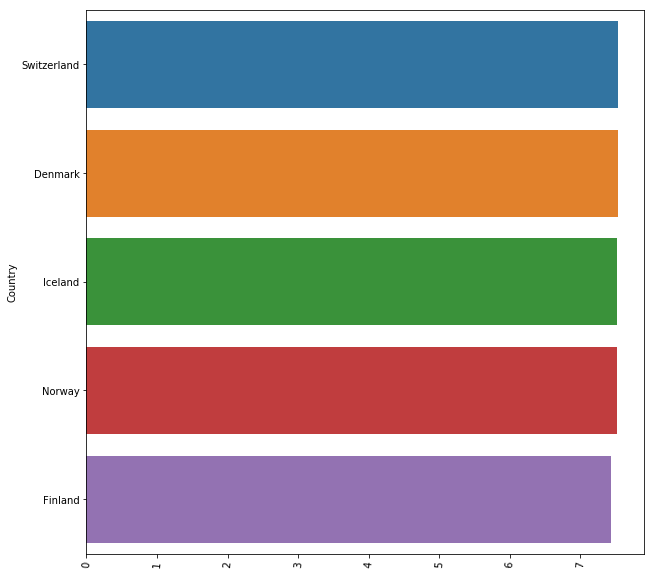

In [13]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=85)
# sns.barplot(x=top_10_region.index, y=top_10_region.values.flatten())

sns.barplot(x=top_5_happy_country.values.flatten(), y=top_5_happy_country.index)

## Top 5 unhappiness countries during 2015-2017

In [14]:
top_5_unhappy_country = data.groupby(['Country'])[['Happiness Score']].mean().nsmallest(5,'Happiness Score')
top_5_unhappy_country

,Happiness Score
Country,
Burundi,2.905000
Syria,3.179000
Central African Republic,3.185500
Togo,3.212333
Rwanda,3.483667


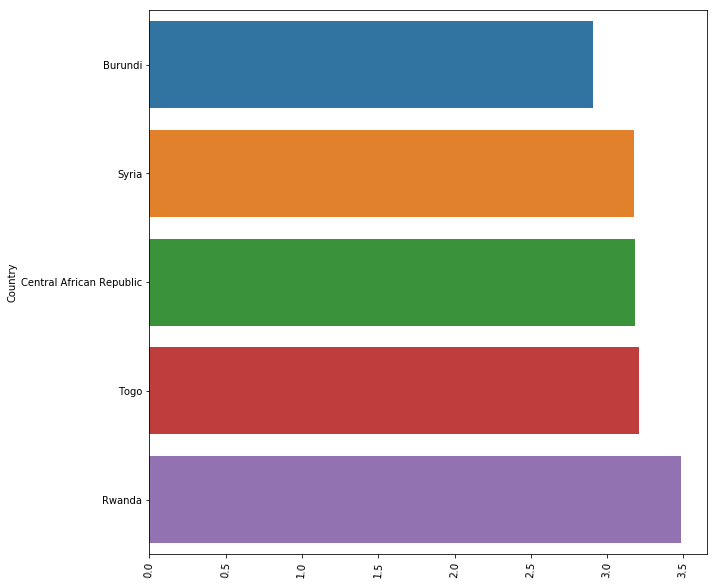

In [15]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=85)
# sns.barplot(x=top_10_region.index, y=top_10_region.values.flatten())

sns.barplot(x=top_5_unhappy_country.values.flatten(), y=top_5_unhappy_country.index)

## Top 5 happiness regions during 2015-2017

In [16]:
top_5_happy_region = data.groupby(['Region'])[['Happiness Score']].mean().nlargest(5,'Happiness Score')
top_5_happy_region

,Happiness Score
Region,
Australia and New Zealand,7.302500
North America,7.227167
Western Europe,6.693000
Latin America and Caribbean,6.069074
Eastern Asia,5.632333


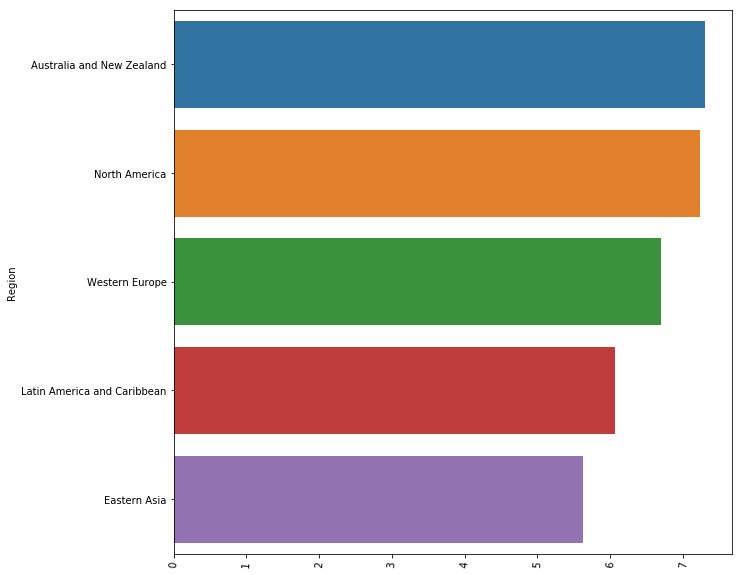

In [17]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=85)

sns.barplot(x=top_5_happy_region.values.flatten(), y=top_5_happy_region.index)

## Top 5 unhappiness regions during 2015-2017

In [18]:
top_5_unhappy_region = data.groupby(['Region'])[['Happiness Score']].mean().nsmallest(5,'Happiness Score')
top_5_unhappy_region

,Happiness Score
Region,
Sub-Saharan Africa,4.150957
Southern Asia,4.590857
Southeastern Asia,5.364077
Central and Eastern Europe,5.371184
Middle East and Northern Africa,5.387879


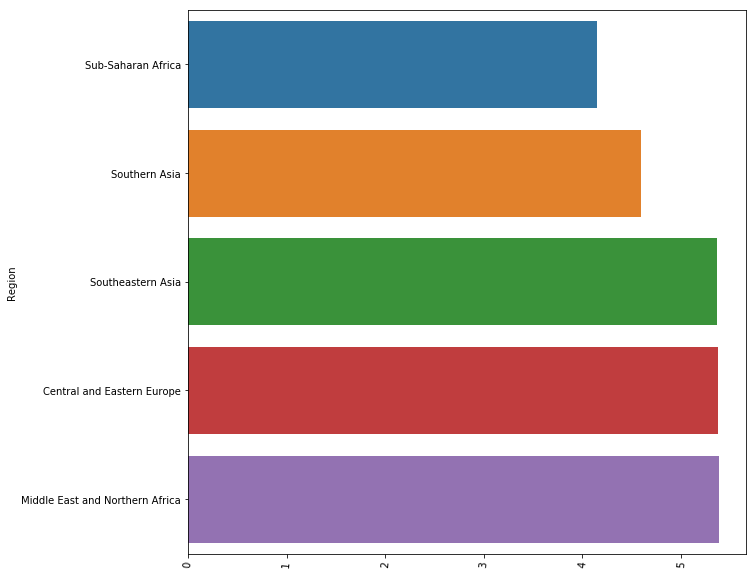

In [19]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=85)

sns.barplot(x=top_5_unhappy_region.values.flatten(), y=top_5_unhappy_region.index)

## Vietnam Happiness Statistics

### What is the ranking of happiness of Vietnam throughout 3 years ?

In [20]:
data[data['Country'] == 'Vietnam']

,Country,Region,Year,Happiness Score,Economy,Family,Life Expectancy,Freedom,Corruption,Generosity,Dictatorship
74,Vietnam,Southeastern Asia,2015,5.360,0.632160,0.912260,0.746760,0.594440,0.104410,0.168600,2.201730
253,Vietnam,Southeastern Asia,2016,5.061,0.740370,0.791170,0.661570,0.559540,0.115560,0.250750,1.941800
408,Vietnam,Southeastern Asia,2017,5.074,0.788548,1.277491,0.652169,0.571056,0.087633,0.234968,1.462319


### Compare perception of Corruption between Vietnam and most happiness country (Switzerland) in 2015

In [21]:
corruption_VN = data[data['Country'] == 'Vietnam'][data['Year'] == 2015]['Corruption']
country = 'Vietnam'
print(country, corruption_VN)
corruption_SL = data[data['Country'] == 'Switzerland'][data['Year'] == 2015]['Corruption']
country = 'Switzerland'
print(country, corruption_SL)

Vietnam 74    0.10441
Name: Corruption, dtype: float64
Switzerland 0    0.41978
Name: Corruption, dtype: float64


C:\Users\hiep.pham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\hiep.pham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Discussion: in 2015 Switzerland ranked 1st happiness country, Vietnam 75th. Switzerland perceived corruption 4/10 affecting Happiness, whereas Vietnam perceived it only 1/10. In other words, Vietnam perceived corruption had little impact on their happiness. This may be explained that Vietnam finds corruption is just part of life, and get used to it. While Swiss people find it very affecting their overall happiness.

## Compare perception of Dictatorship between Vietnam and most happiness country (Switzerland) in 2015

In [38]:
dictator_VN = data[data['Country'] == 'Vietnam'][data['Year'] == 2015]['Dictatorship']
country = 'Vietnam'
print(country, dictator_VN)
dictator_SL = data[data['Country'] == 'Switzerland'][data['Year'] == 2015]['Dictatorship']
country = 'Switzerland'
print(country, dictator_SL)

Vietnam 74    2.20173
Name: Dictatorship, dtype: float64
Switzerland 0    2.51738
Name: Dictatorship, dtype: float64


C:\Users\hiep.pham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\hiep.pham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Discussion: in 2015 Switzerland ranked 1st happiness country, Vietnam 75th. Switzerland perceived corruption 2.5/10 affecting Happiness, whereas Vietnam perceived it slighly lower at 2.2/10. In other words, Vietnam perceived power dictatorship to be less affecting happiness than Switzerland.

# Data model analysis

## Explore correlations among all factors in the data (using heatmap and linear model plot)

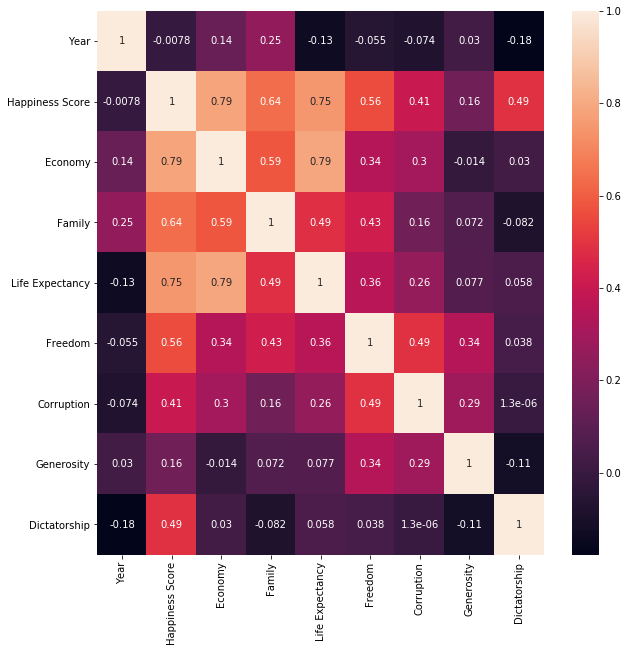

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

1. Happiness has strongest correlationss with Economy and Life Expectancy (0.79 and 0.75 respectively)
2. Happiness has weakest correlations wtih Generousity and Corruption
3. Economy (GDP) and Life Expectancy (Health) also have strong correlation with each other (0.79). It means a richer country normally will have a longer life expectancy.

C:\Users\hiep.pham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

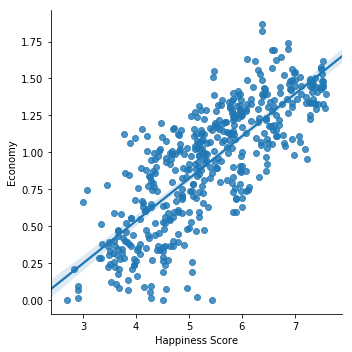

In [23]:
#Create a linear model plot (using seaborn's lmplot) of Happiness Score vs. Economy
plt.figure(figsize=(10,10))
sns.lmplot(x="Happiness Score", y="Economy", data=data)

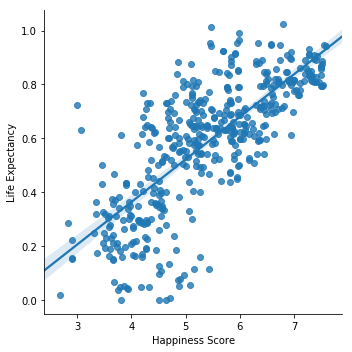

In [24]:
#Create a linear model plot (using seaborn's lmplot) of Happiness Score vs. Life Expectatancy
sns.lmplot(x="Happiness Score", y="Life Expectancy", data=data)

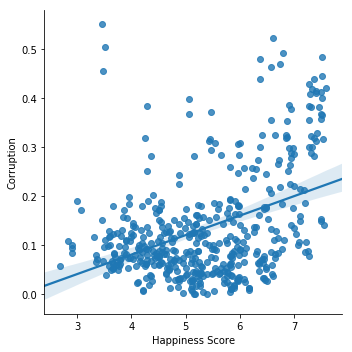

In [25]:
#Create a linear model plot (using seaborn's lmplot) of Happiness Score vs. Corruption
sns.lmplot(x="Happiness Score", y="Corruption", data=data)  # no clear correlation

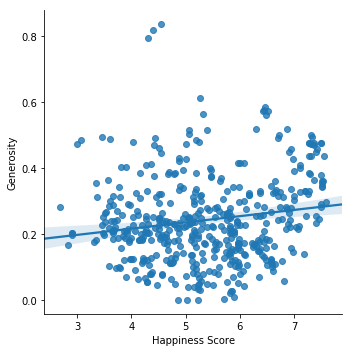

In [26]:
#Create a linear model plot (using seaborn's lmplot) of Happiness Score vs. Generosity
sns.lmplot(x="Happiness Score", y="Generosity", data=data) # Poor correlation

## Create training data set


In [27]:
# Set a variable X equal to the numerical features of Happy Score and a variable y equal to the "Happy Score" column.
# Since Economy and Life Expectancy are strongly correlated with each other, only Economy is kept in 
# the training/testing data set to reduce multicollinearity issue

X = data[['Economy', 'Family','Freedom', 'Corruption','Generosity', 'Dictatorship']]
y = data['Happiness Score']

## Split data set into training and test

In [28]:
from sklearn.model_selection import train_test_split  # need 2 dimension array

# Train, test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # test_size: how many % used for training

In [29]:
# # Set a variable X equal to the numerical features of Happy Score and a variable y equal to the "Happy Score" column.

# X_2016 = data_2016[['Life Expectancy','Freedom', 'Corruption','Generosity', 'Dictatorship']]
# y_2016 = data_2016['Happiness Score']

# print(X_2016.shape)
# print(y_2016.shape)

## Train our model on our training data!

In [30]:
# Import LinearRegression from sklearn.linear_model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Train/fit lm on the training data

lm.fit(X_train, y_train)

# Print out the coefficients of the model
lm.coef_

array([1.45847676, 0.97451671, 1.19931848, 0.81666266, 1.14453026,
       1.0237669 ])

Use lm.predict() to predict off the X_test set of the data

In [31]:
predictions = lm.predict(X_test)

Create a scatterplot of the real test values versus the predicted values

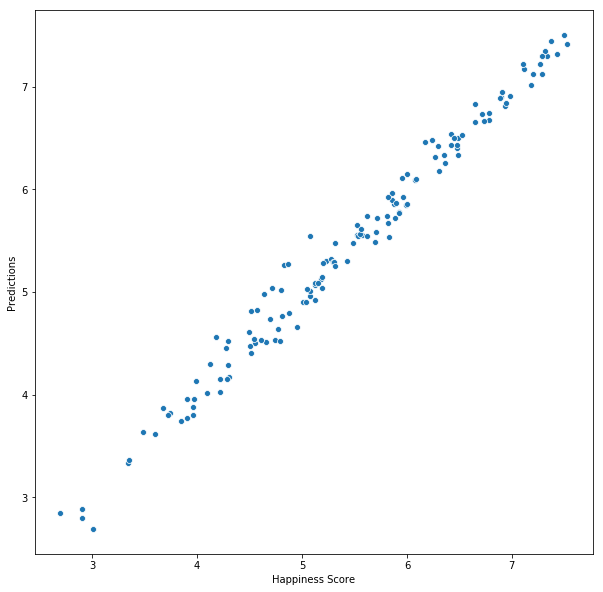

In [32]:
plt.figure(figsize=(10,10))
plt.xlabel('True values')
plt.ylabel('Predictions')
sns.scatterplot(y_test, predictions)

## Evaluating the model

In [33]:
# Calculate: Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)

print (mae)
print (mse)
print (rmse)

0.10817602322594698
0.02085793558572717
0.14442276685386957


The MAE and the RMSE can be used together to diagnose the variation in the errors in a set of forecasts. The RMSE will always be larger or equal to the MAE; the greater difference between them, the greater the variance in the individual errors in the sample. If the RMSE=MAE, then all the errors are of the same magnitude.

Both the MAE and RMSE can range from 0 to ∞. Lower values are better.

When the value of MSE is zero, it means that there is perfect accuracy found by the estimator θ^ of the parameter θ. This condition is ideal and usually not practically possible. An unbiased estimator having the smallest variance among all the given unbiased estimators is said to be the best prediction because it tends to minimise the variance. It is the best unbiased estimator and is known as the minimum variance unbiased estimator (abbreviated as MVUE). The values of MSE could be used for making comparisons between two or more statistical models. It can be measured how well illustrated a given data set.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist()

C:\Users\hiep.pham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


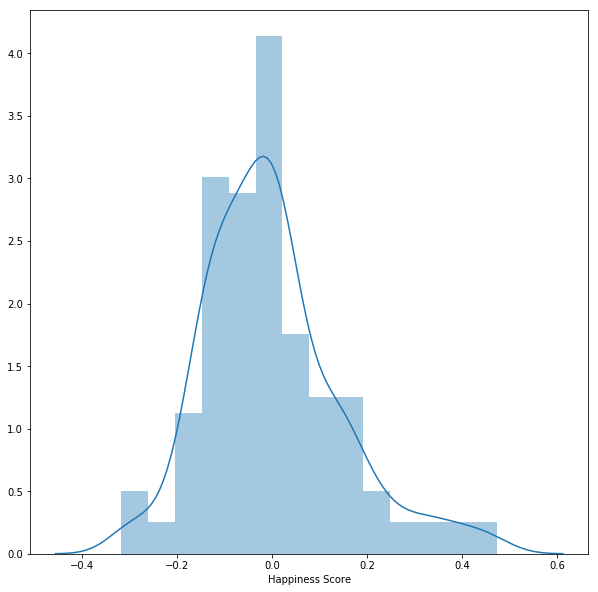

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(predictions - y_test)  # residual is the differences between predictions and true y data

In [35]:
X.head()

,Economy,Family,Freedom,Corruption,Generosity,Dictatorship
0,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176


In [36]:
# Calculate Coefficient of the model

pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])

,Coefficient
Economy,1.458477
Family,0.974517
Freedom,1.199318
Corruption,0.816663
Generosity,1.144530
Dictatorship,1.023767


# Conclusion

This project is examining world happiness dataset in 2015, 2016 and 2016. The dataset contains happiness scores and affecting factors: Economy (GDP), Family, Health (Life Expectancy), Freedom, Corruption, Generosity and Dictatorship.

It finds that Australia and New Zealand top the happiness scores overall, followed by Norther Ameria and Western Europe. Middle East and Northern Africa scored the lowest happiness scores during that time.

Vietnam ranked 74 in 2015 and quite similar in 2016 and 2017. 

The regression analysis (shown in heatmap photo) shows that Economy and Life expectancy most affect happiness, whereas Generosity and Corruption least affect happiness. Economy and life expectancy also have strong correction with each other, which means a higher GDP country normally has a longer life expectancy as well.

Comparing Vietnam and Switzerland (the happiest country in the world) indicates that Vietnam rated corruption and power dictationship having lower impact on happiness than Switzerland. This can be explained that Vietnam people find those factors quite common and no longer having much impact on their perceived happiness.

The model found has a relatively high accuracy rate with low Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error values. Overall, the predicted model can explain quite well the happiness level of a country based on the identified determinants.